In [1]:
#include autoreload modules for fast testing and update
%load_ext autoreload
%autoreload 2

#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sbn
import time

#import modules
from src.data.helper_closed_transactions import read_epex_file, filter_lead_time, extract_transactions
from src.visualization.visualize_transactions import executed_transactions_bar_chart, executed_transactions_heatmap_summary, executed_transactions_time_series
from src.data.bid_ask_spread import hourly_bid_ask_spread, hourly_bid_ask_spread_depth
from src.visualization.visualize_bid_ask_spread import hourly_bid_ask_spread_plot

#set maximum columns display pandas
pd.options.display.max_columns = 50
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Pipeline EPEX

In [2]:
tic = time.time()
df=read_epex_file(
    "../data/external/EPEX_spot_continous_2019/DE Continuous Orders 2019-10/DE Continuous Orders 20191001.csv",
    fast_load=False)
toc = time.time()

In [3]:
print(f'Reading and processing one file completely takes {toc-tic} seconds')

Reading and processing one file completely takes 24.7465398311615 seconds


In [4]:
df_filtered=filter_lead_time(df)

In [5]:
pivoted, pivoted_levels=extract_transactions(df_filtered, new_data_type=False)

In [6]:
pivoted_levels.head()

Delivery Start_B  \
End Validity Date                Executed Price & Volume                             
2019-09-30 23:16:56.314000+00:00 (34.4, 0.25)            2019-10-01 00:15:00+00:00   
                                 (34.52, 0.2)            2019-10-01 00:15:00+00:00   
                                 (34.6, 0.05)            2019-10-01 00:15:00+00:00   
2019-09-30 23:16:56.398000+00:00 (34.22, 0.25)           2019-10-01 00:15:00+00:00   
2019-09-30 23:17:20.690000+00:00 (34.6, 0.125)           2019-10-01 00:15:00+00:00   

                                                         Executed Volume_B  \
End Validity Date                Executed Price & Volume                     
2019-09-30 23:16:56.314000+00:00 (34.4, 0.25)                        0.250   
                                 (34.52, 0.2)                        0.200   
                                 (34.6, 0.05)                        0.050   
2019-09-30 23:16:56.398000+00:00 (34.22, 0.25)                       0.250   
2019-09-30 23:17:20.690000+00:00 (34.6, 0.125)                       0.125   

                                                         Execution Price_B  \
End Validity Date                Executed Price & Volume                     
2019-09-30 23:16:56.314000+00:00 (34.4, 0.25)                       34.400   
                                 (34.52, 0.2)                       34.520   
                                 (34.6, 0.05)                       34.600   
2019-09-30 23:16:56.398000+00:00 (34.22, 0.25)                      34.220   
2019-09-30 23:17:20.690000+00:00 (34.6, 0.125)                      34.600   

                                                         Initial ID_B  \
End Validity Date                Executed Price & Volume                
2019-09-30 23:16:56.314000+00:00 (34.4, 0.25)             10524151567   
                                 (34.52, 0.2)             10524151567   
                                 (34.6, 0.05)             10524151567   
2019-09-30 23:16:56.398000+00:00 (34.22, 0.25)            10524153934   
2019-09-30 23:17:20.690000+00:00 (34.6, 0.125)            10524154088   

                                                         Instrument Type_B  \
End Validity Date                Executed Price & Volume                     
2019-09-30 23:16:56.314000+00:00 (34.4, 0.25)                 Quarter Hour   
                                 (34.52, 0.2)                 Quarter Hour   
                                 (34.6, 0.05)                 Quarter Hour   
2019-09-30 23:16:56.398000+00:00 (34.22, 0.25)                Quarter Hour   
2019-09-30 23:17:20.690000+00:00 (34.6, 0.125)                Quarter Hour   

                                                         Is Executed_B  \
End Validity Date                Executed Price & Volume                 
2019-09-30 23:16:56.314000+00:00 (34.4, 0.25)                        2   
                                 (34.52, 0.2)                        2   
                                 (34.6, 0.05)                        1   
2019-09-30 23:16:56.398000+00:00 (34.22, 0.25)                       1   
2019-09-30 23:17:20.690000+00:00 (34.6, 0.125)                       2   

                                                         Is block_B  \
End Validity Date                Executed Price & Volume              
2019-09-30 23:16:56.314000+00:00 (34.4, 0.25)                     N   
                                 (34.52, 0.2)                     N   
                                 (34.6, 0.05)                     N   
2019-09-30 23:16:56.398000+00:00 (34.22, 0.25)                    N   
2019-09-30 23:17:20.690000+00:00 (34.6, 0.125)                    N   

                                                           Order ID_B  \
End Validity Date                Executed Price & Volume                
2019-09-30 23:16:56.314000+00:00 (34.4, 0.25)             10524153932   
                                 (34.52, 0.2)             10524153932   
 

#### ID exploration for bid-ask spread calculation

Exploring ID monitoring of the contracts to understand what the different ID columns (```Order ID```, ```Initial ID``` and ```Parent ID```) mean

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017600 entries, 0 to 1017599
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype              
---  ------                   --------------    -----              
 0   Order ID                 1017600 non-null  int64              
 1   Initial ID               1017600 non-null  int64              
 2   Parent ID                599370 non-null   float64            
 3   Start Validity Date      1017600 non-null  datetime64[ns, UTC]
 4   End Validity Date        1017600 non-null  datetime64[ns, UTC]
 5   Cancelling Date          761368 non-null   datetime64[ns, UTC]
 6   Delivery Date            1017600 non-null  datetime64[ns, UTC]
 7   Instrument Type          1017600 non-null  object             
 8   Delivery Instrument      1017600 non-null  timedelta64[ns]    
 9   Is block                 1017600 non-null  object             
 10  Area                     1017600 non-null  object             
 11

```Initial ID``` and ```Order ID``` rows are not as many as as the total entries, meaning that:

- ```Initial ID``` is unique for orders which are originated from the same first order
- ```Order ID``` is created any time a modification is done to the previous order.


In [51]:
df['Initial ID'].unique().shape

(325693,)

In [7]:
df['Order ID'].unique().shape

(846794,)

```Initial ID``` and ```Order ID``` are the same only for the first addition of the order to the book. Hence where the ```Parent ID``` is ```nan```, then the ```Order ID``` is also equal to the ```Parent ID```

In [8]:
df[df['Initial ID']==df['Order ID']].head()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume,lead_time
0,10523814627,10523814627,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,B,-199.000,5.400,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
1,10523814628,10523814628,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,B,-199.000,5.200,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
2,10523814629,10523814629,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,S,199.000,5.500,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
3,10523814630,10523814630,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,S,199.000,5.300,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
4,10523814686,10523814686,nan,2019-09-30 15:00:05.586000+00:00,2019-09-30 15:00:18.558000+00:00,2019-09-30 15:00:18.557000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 01:00:00,N,DE-AMP,B,8.090,5.000,0,nan,0.000,"(nan, 0.0)",0 days 09:59:54.414000


In [9]:
df[df['Parent ID'].isnull()].head()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume,lead_time
0,10523814627,10523814627,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,B,-199.000,5.400,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
1,10523814628,10523814628,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,B,-199.000,5.200,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
2,10523814629,10523814629,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,S,199.000,5.500,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
3,10523814630,10523814630,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,S,199.000,5.300,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
4,10523814686,10523814686,nan,2019-09-30 15:00:05.586000+00:00,2019-09-30 15:00:18.558000+00:00,2019-09-30 15:00:18.557000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 01:00:00,N,DE-AMP,B,8.090,5.000,0,nan,0.000,"(nan, 0.0)",0 days 09:59:54.414000


As it can be seen the ```Initial ID``` is the one which keep tracks of the initial order placed on the book. The ```Parent ID``` only shows what is the previous "parent" order from which the new order derivies from. In other words the ```Parent ID``` shows the previous leaf in the tree, while the ```Initial ID``` shows the root of the tree.

This information is useful to understand how contracts are modified and therefore how to treat them in our calculations. Now, an investigation of what happens when an order is modified, matched or cancelled is made.

First a dataframe with index the ```Initial ID``` is made

In [26]:
df_initial_id=df.set_index('Initial ID')

In [32]:
df_initial_id.head()

,Order ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume,lead_time
Initial ID,,,,,,,,,,,,,,,,,,
10523814627,10523814627,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,B,-199.000,5.400,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
10523814628,10523814628,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,B,-199.000,5.200,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
10523814629,10523814629,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,S,199.000,5.500,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
10523814630,10523814630,nan,2019-09-30 15:00:02.488000+00:00,2019-09-30 15:00:24.095000+00:00,2019-09-30 15:00:24.097000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 05:00:00,N,DE-AMP,S,199.000,5.300,0,nan,0.000,"(nan, 0.0)",0 days 13:59:57.512000
10523814686,10523814686,nan,2019-09-30 15:00:05.586000+00:00,2019-09-30 15:00:18.558000+00:00,2019-09-30 15:00:18.557000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 01:00:00,N,DE-AMP,B,8.090,5.000,0,nan,0.000,"(nan, 0.0)",0 days 09:59:54.414000


Check how many unique initial id values are there to explore the lifetime of a contract

In [33]:
df['Initial ID'].value_counts()

10524113457    4679
10524075033    2438
10524076559    2378
10524535881    2131
10525025260    1775
               ... 
10524056624       1
10524073000       1
10524103705       1
10524128277       1
10524557312       1
Name: Initial ID, Length: 325693, dtype: int64

By getting a set of rows with the same random ```Initial ID``` one can check what are the parameters which can be veried in a life contract and the meaning the ```Cancelling Date```.

In [34]:
df_contract_analysis=df_initial_id.loc[10524393716]

In [35]:
df_contract_analysis.reset_index(inplace=True)

As it can be seen the contract is usually amended by changing its price value until the execution.

Moreover it can be seen from the following when an order is matched or partially matched immediately a new order is created with the start validity date being the end validity date of the previous one. Therefore every time an order is modified a modification to the ```End Validity Date``` is performed and there is no need to keep track of the ```Initial ID``` to use the data for bid-ask spread calculations.

However this means that the closed orders do count for the bid and ask spread calculations.

Below an example of lifetime of an order is shown, at the end the fact that this is an iceberg order is identified.

In [36]:
df_contract_analysis

,Initial ID,Order ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume,lead_time
0,10524393716,10524393716,nan,2019-10-01 06:06:33.029000+00:00,2019-10-01 06:06:55.612000+00:00,2019-10-01 06:06:55.613000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,41.100,9.500,0,nan,0.000,"(nan, 0.0)",0 days 01:53:26.971000
1,10524393716,10524394015,10524393716.000,2019-10-01 06:06:55.612000+00:00,2019-10-01 06:07:07.678000+00:00,2019-10-01 06:07:07.677000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,41.300,9.500,0,nan,0.000,"(nan, 0.0)",0 days 01:53:04.388000
2,10524393716,10524394150,10524394015.000,2019-10-01 06:07:07.678000+00:00,2019-10-01 06:07:25.611000+00:00,2019-10-01 06:07:25.610000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,41.500,9.500,0,nan,0.000,"(nan, 0.0)",0 days 01:52:52.322000
3,10524393716,10524394340,10524394150.000,2019-10-01 06:07:25.611000+00:00,2019-10-01 06:07:45.876000+00:00,2019-10-01 06:07:45.877000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,41.700,9.500,0,nan,0.000,"(nan, 0.0)",0 days 01:52:34.389000
4,10524393716,10524394541,10524394340.000,2019-10-01 06:07:45.876000+00:00,2019-10-01 06:08:05.842000+00:00,2019-10-01 06:08:05.843000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,41.800,9.500,0,nan,0.000,"(nan, 0.0)",0 days 01:52:14.124000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,10524393716,10524405779,10524405749.000,2019-10-01 06:26:31.687000+00:00,2019-10-01 06:26:36.282000+00:00,2019-10-01 06:26:36.283000+00:00,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,42.700,9.500,0,nan,0.000,"(nan, 0.0)",0 days 01:33:28.313000
72,10524393716,10524405817,10524405779.000,2019-10-01 06:26:36.282000+00:00,2019-10-01 06:26:52.743000+00:00,NaT,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,43.100,9.500,2,43.100,2.100,"(43.1, 2.1)",0 days 01:33:23.718000
73,10524393716,10524405817,10524405779.000,2019-10-01 06:26:52.743000+00:00,2019-10-01 06:27:05.640000+00:00,NaT,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,43.100,7.400,2,43.100,7.400,"(43.1, 7.4)",0 days 01:33:07.257000
74,10524393716,10524405817,10524405779.000,2019-10-01 06:27:05.640000+00:00,2019-10-01 06:27:05.640000+00:00,NaT,2019-10-01 00:00:00+00:00,Hour,0 days 08:00:00,N,DE-AMP,B,43.100,0.000,0,nan,0.000,"(nan, 0.0)",0 days 01:32:54.360000


Filtering for orders with same Start and End Validity

In [51]:
df[(df['Start Validity Date']==df['End Validity Date'])&
  (df['Volume']!=0)]['Is Executed'].unique()

array([2, 1, 0])

There appear to be some Stylized Facts:

- When an order is matched partially, it is followed by a new order with the remaining volume and, if eventually executed, the `End Validity Date` different from the `Cancelling Date`.
- When an order has a `Cancelling Date` different from `nan` the following options might be true: the order has been **modified** (price), the order can be **activated** or **deactivated**, the order can be **definitely cancelled**. 
- There are some orders which appear to have a `Volume` of zero and the same `Start Validity Date` and `End Validity Date`: they indicate **Iceberg Orders**. Based on the data analysis, once the visible order is consumed, it is followed by an order with the same ID and volume zero.
- `Start Validity Date` and `End Validity Date` are the same for orders which are either fully immediately matched or partially matched immediately (excluding the cases of Iceberg Orders)
- Not all orders can be closed since only the German area is considered (Eg. block orders in the day analyzed in this notebook result not to be in the closed transaction list)
- It has not been checked since many different variables have to be checked and it was not influencing strongly the project, but it is assumed that an order can be modified in many ways: vary the price, vary the volume, vary the instrument type, ...

#### Bid-ask spread calculation

There is no need to take account for the orders ID in the calculation of the Bid-Ask spread since any time a new order is changed, a new price and volume is produced. As a consequence if, in an interval of 1 hour an order is modified by changing the bid or ask price or changing the volume offered this can be counted as a new item introduced and it doesn't imply double counting as long as the price is weighted with the volume associated.

Instead, bid and ask calculation shall not count of entries in which a contract is either closed or cancelled since this entry in the limit order book does not imply that a new order is introduced, but only that an order is processed and effectively goes out of the market. In fact, in the case order with ```Initial ID```=A with a validity period from 12:00 to 15:00 which is closed at 14:00, does not need to be included in the bid and ask spread calculated from 14:00 to 15:00

The only filtering which has to be done is for orders with volumes equal zero since this indicate IceBerg Orders. IceBerg orders are placed in the LOB partially so this does not affect the calculation of the Bid-Ask-Spread in time.


Liquidity indicators for LOB

In [106]:
starttime="30/09/2019 15:00"

df_validity=hourly_bid_ask_spread(df, starttime)

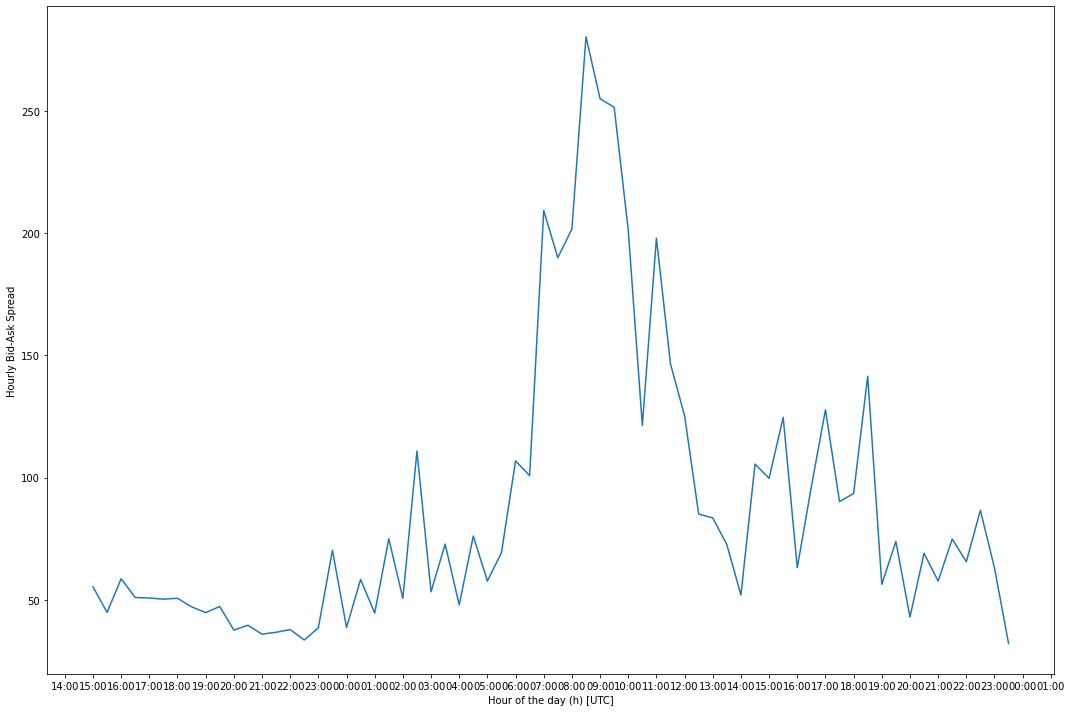

In [107]:
hourly_bid_ask_spread_plot(df_validity)

Depth plots

In [15]:
starttime="30/09/2019 15:00"

depth=hourly_bid_ask_spread_depth(df, starttime,minute_depth=1)

In [16]:
ordered_bids_volumes=[x for _,x in sorted(zip(depth[2],depth[3]))]
ordered_bids_prices=sorted(depth[2])

In [17]:
ordered_ask_volumes=[x for _,x in sorted(zip(depth[0],depth[1]))]
ordered_ask_prices=sorted(depth[0])

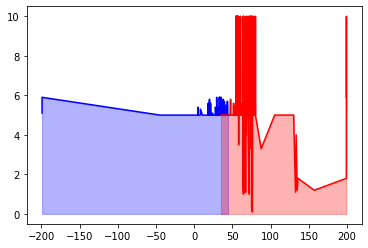

In [19]:
# N=1000
# plt.figure(figsize=(10,7))
# plt.plot(ordered_bids_prices,np.convolve(ordered_bids_volumes, np.ones(N)/N, mode='same'), c='blue')
# plt.fill_between(ordered_bids_prices, np.convolve(ordered_bids_volumes, np.ones(N)/N, mode='same'), color='blue', alpha=0.3)
# plt.plot(ordered_ask_prices,np.convolve(ordered_ask_volumes, np.ones(N)/N, mode='same'), c='red')
# plt.fill_between(ordered_ask_prices, np.convolve(ordered_ask_volumes, np.ones(N)/N, mode='same'), color='red', alpha=0.3)


plt.plot(ordered_bids_prices,ordered_bids_volumes, c='blue')
plt.fill_between(ordered_bids_prices, ordered_bids_volumes, color='blue', alpha=0.3)
plt.plot(ordered_ask_prices,ordered_ask_volumes, c='red')
plt.fill_between(ordered_ask_prices, ordered_ask_volumes, color='red', alpha=0.3)

